In [2]:
import pandas as pd
# 1. Data Loading and Initial Inspection
df_train = pd.read_csv('../Data/train.csv', parse_dates=['Date'])
df_train

C:\Users\Addisu\AppData\Local\Temp\ipykernel_11820\364675887.py:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv('../Data/train.csv', parse_dates=['Date'])


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [3]:
df_test=pd.read_csv('../Data/test.csv', parse_dates=['Date'])
df_test

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [4]:
df_store=pd.read_csv('../Data/store.csv')
df_store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [5]:
df_sample_submission=pd.read_csv('../Data/sample_submission.csv')
df_sample_submission

,Id,Sales
0,1,5675.812105
1,2,7362.613632
2,3,7188.165043
3,4,7178.652328
4,5,7178.652328
...,...,...
41083,41084,3141.535433
41084,41085,4041.519933
41085,41086,4913.299933
41086,41087,24214.010000


In [6]:
df_test_m= df_test.merge(df_sample_submission[['Id', 'Sales']], on='Id', how='left')

In [13]:
def calculate_daily_averages(df):
    """Calculate daily averages of Sales and mode for other columns."""
    # Drop 'Id' and 'Store' columns if they exist
    df = df.drop(columns=['Id', 'Store'], errors='ignore')

    daily_averages = df.groupby('Date').agg({
        'Sales': 'mean',  # Mean of Sales
        'DayOfWeek': lambda x: x.mode()[0],  # Mode of DayOfWeek
        'Open': lambda x: x.mode()[0],  # Mode of Open
        'Promo': lambda x: x.mode()[0],  # Mode of Promo
        'StateHoliday': lambda x: x.mode()[0],  # Mode of StateHoliday
        'SchoolHoliday': lambda x: x.mode()[0]   # Mode of SchoolHoliday
    }).reset_index()
    return daily_averages
# Usage example for training data
df_test_avg=calculate_daily_averages(df_test_m)
df_train_avg=calculate_daily_averages(df_train)
df_train_avg.to_csv('../Data/df_train.csv', index=False)
df_test_avg.to_csv('../Data/df_test.csv', index=False)
df_test_avg
df_train_avg


,Date,Sales,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday
0,2013-01-01,87.284560,2,0,0,a,1
1,2013-01-02,6233.030493,3,1,0,0,1
2,2013-01-03,5693.112108,4,1,0,0,1
3,2013-01-04,5954.218834,5,1,0,0,1
4,2013-01-05,5337.751570,6,1,0,0,0
...,...,...,...,...,...,...,...
937,2015-07-27,9602.952466,1,1,1,0,1
938,2015-07-28,8174.953363,2,1,1,0,1
939,2015-07-29,7623.284305,3,1,1,0,1
940,2015-07-30,7891.348879,4,1,1,0,1


In [14]:
df_test_merge= df_test.merge(df_sample_submission[['Id', 'Sales']], on='Id', how='left')

EDA_Analysis of Rossmann Pharmaceuticals sales
---
1. Check for distribution in both training and test sets - are the promotions distributed similarly between these two groups?

2024-09-21 08:56:30,969 - INFO - Loading datasets...
d:\10 ACADAMY KIFIYA\Week_4\Rossman_Sales_Forcast\scripts\EDA_Analysis.py:15: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  self.df_train = pd.read_csv(train_file)
2024-09-21 08:56:31,595 - INFO - Train columns: ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday']
2024-09-21 08:56:31,596 - INFO - Test columns: ['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday']
2024-09-21 08:56:31,731 - INFO - Merging datasets on 'Store'...
2024-09-21 08:56:44,758 - INFO - Comparing promo distribution between training and test sets...
--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\Addisu\AppData\Local\Programs\Python\Python312\Lib\logging\__init__.py", line 1160, in emit
    msg = self.format(record)
          ^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Addisu\AppData\Local\Programs\Python\Py

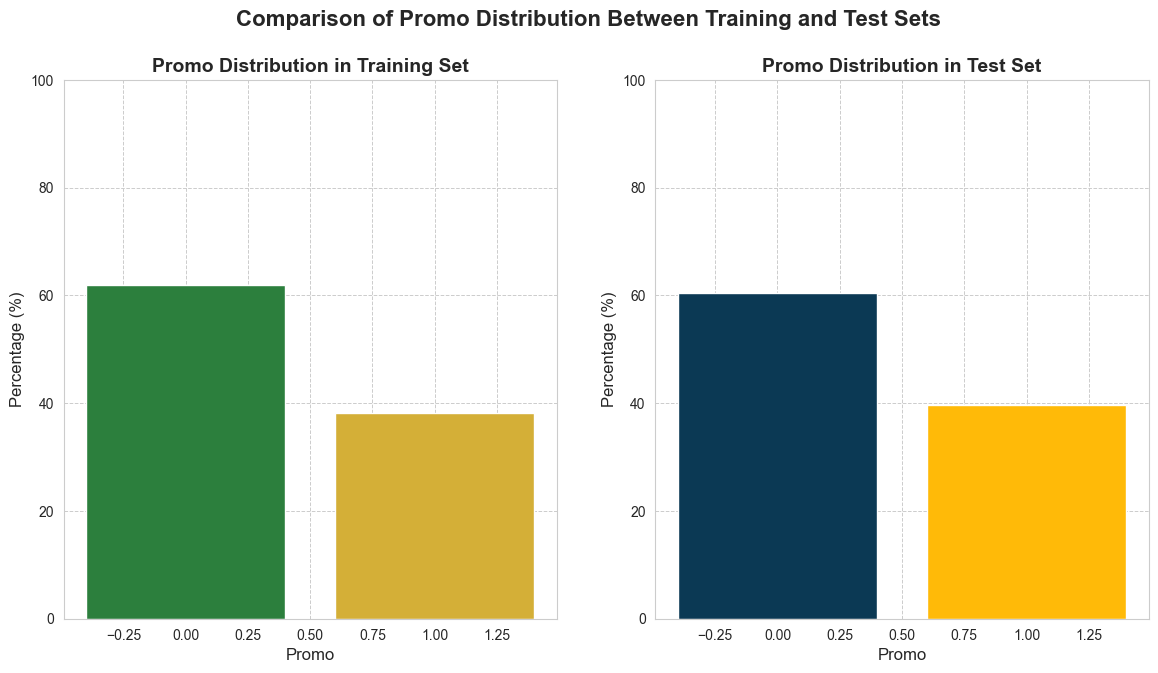

2024-09-21 08:56:46,267 - INFO - Promo distribution comparison plot saved to ../Images/promo_distribution_comparison.png


In [6]:
import sys
import os
import pandas as pd
sys.path.append(os.path.abspath('../scripts'))


from EDA_Analysis import EDA_Analysis
eda = EDA_Analysis(train_file='../Data/train.csv', test_file='../Data/test.csv')
eda.promo_distribution_comparison(save_path='../Images/promo_distribution_comparison.png')

2. sales_holidays_comparison: before,During and After

2024-09-21 08:56:46,281 - INFO - Loading datasets...
d:\10 ACADAMY KIFIYA\Week_4\Rossman_Sales_Forcast\scripts\EDA_Analysis.py:15: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  self.df_train = pd.read_csv(train_file)
2024-09-21 08:56:46,994 - INFO - Train columns: ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday']
2024-09-21 08:56:46,996 - INFO - Test columns: ['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday']
2024-09-21 08:56:47,148 - INFO - Merging datasets on 'Store'...
2024-09-21 08:57:04,450 - INFO - Analyzing sales around holidays...
2024-09-21 08:57:08,400 - INFO - Average Sales Before Holiday: 5838.17
2024-09-21 08:57:08,401 - INFO - Average Sales During Holiday: 4812.28
2024-09-21 08:57:08,402 - INFO - Average Sales After Holiday: 5747.05
d:\10 ACADAMY KIFIYA\Week_4\Rossman_Sales_Forcast\scripts\EDA_Analysis.py:111: FutureWarning: 

Pa

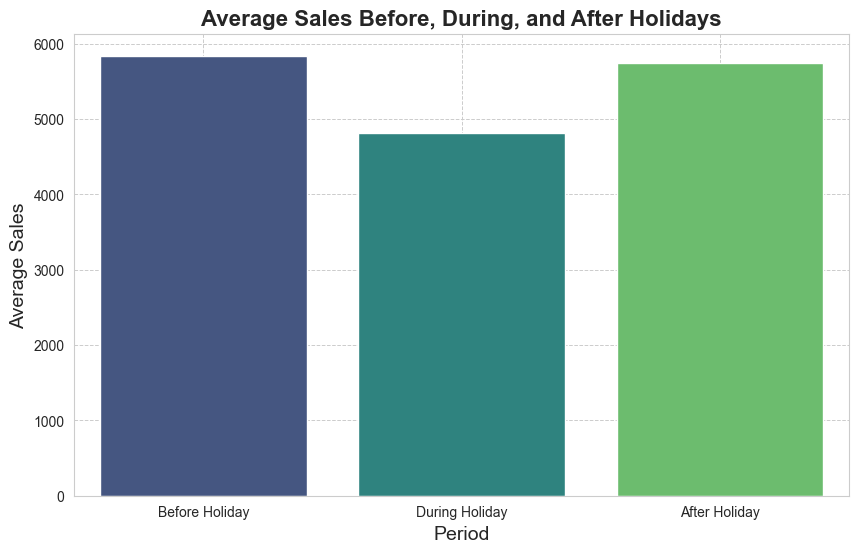

2024-09-21 08:57:08,910 - INFO - Sales analysis around holidays plot saved to ../Images/sales_holidays_comparison.png


In [7]:
# Assuming EDA_Analysis is already defined in EDA_Analysis.py and correctly imported

# Initialize the EDA_Analysis class with paths to train and test data
eda = EDA_Analysis(train_file='../Data/train.csv', test_file='../Data/test.csv')

# Perform the analysis on sales behavior around holidays and save the plot
eda.analyze_sales_around_holidays(save_path='../Images/sales_holidays_comparison.png')

3. (Christmas, Easter, etc) purchase behaviors

2024-09-21 08:57:09,111 - INFO - Loading datasets...
d:\10 ACADAMY KIFIYA\Week_4\Rossman_Sales_Forcast\scripts\EDA_Analysis.py:15: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  self.df_train = pd.read_csv(train_file)
2024-09-21 08:57:09,774 - INFO - Train columns: ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday']
2024-09-21 08:57:09,775 - INFO - Test columns: ['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday']
2024-09-21 08:57:09,955 - INFO - Merging datasets on 'Store'...
2024-09-21 08:57:25,722 - INFO - Analyzing holiday sales for specified dates...
2024-09-21 08:57:25,767 - INFO - Holiday: 2015-12-25, Average Sales - Before: 0.00, During: 0.00, After: 0.00
2024-09-21 08:57:25,814 - INFO - Holiday: 2015-04-05, Average Sales - Before: 7166.19, During: 194.81, After: 4468.92
2024-09-21 08:57:25,895 - INFO - Using categorical units to plot a lis

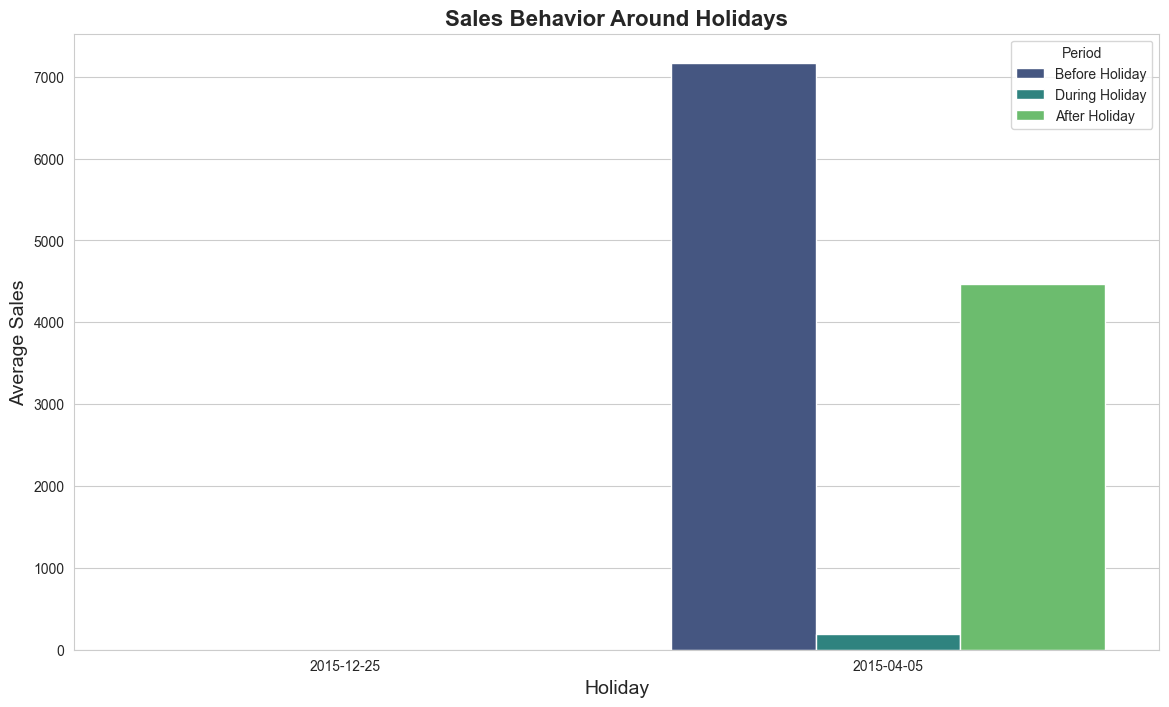

2024-09-21 08:57:26,876 - INFO - Holiday sales analysis plot saved to ../Images/holiday_sales_comparison.png


In [8]:
# Example usage:
eda = EDA_Analysis(train_file='../Data/train.csv', test_file='../Data/test.csv')
eda.analyze_holiday_sales(
    holiday_dates=['2015-12-25', '2015-04-05'],  # Example dates for Christmas and Easter
    window_days=7,  # 7 days before and after the holiday
    save_path='../Images/holiday_sales_comparison.png')


In [9]:

#eda.analyze_customers_sales_correlation()

In [10]:

from Promo_Analysis import Promo_Analysis

# Merge df_test with df_sample_submission on 'Id'
df_test = pd.merge(df_test, df_sample_submission, on='Id', how='left')

# Merge df_train with df_store on 'Store'
df_train = pd.merge(df_train, df_store, left_on='Store', right_on='Store', how='left')

# Print the first few rows of each DataFrame to check the merge
print("df_test after merging with df_sample_submission:")
print(df_test.head())

print("\ndf_train after merging with df_store:")
print(df_train.head())

df_test after merging with df_sample_submission:
   Id  Store  DayOfWeek       Date  Open  Promo StateHoliday  SchoolHoliday  \
0   1      1          4 2015-09-17   1.0      1            0              0   
1   2      3          4 2015-09-17   1.0      1            0              0   
2   3      7          4 2015-09-17   1.0      1            0              0   
3   4      8          4 2015-09-17   1.0      1            0              0   
4   5      9          4 2015-09-17   1.0      1            0              0   

   Sales_x  Sales_y  
0        0        0  
1        0        0  
2        0        0  
3        0        0  
4        0        0  

df_train after merging with df_store:
   Store  DayOfWeek       Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5 2015-07-31   5263        555     1      1            0   
1      2          5 2015-07-31   6064        625     1      1            0   
2      3          5 2015-07-31   8314        821     1      1          

Average Sales with Promo: 7991.15
Average Sales without Promo: 4406.05


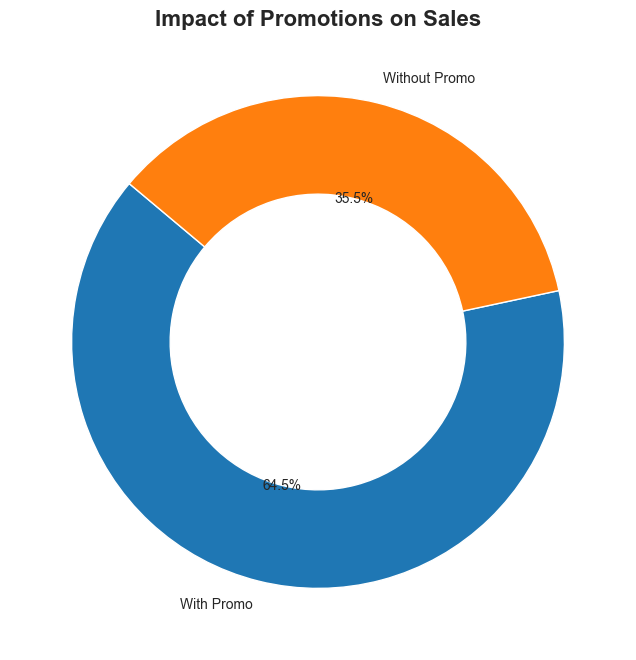

2024-09-21 08:57:28,779 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
d:\10 ACADAMY KIFIYA\Week_4\Rossman_Sales_Forcast\scripts\Promo_Analysis.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=store_sales_comparison.index, y='Sales Increase', data=store_sales_comparison, palette='viridis')
2024-09-21 08:57:28,809 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Stores recommended for promotions based on sales increase:
       Average Sales with Promo  Average Sales without Promo  Sales Increase
Store                                                                       
817                24679.566667                 14043.338488    10636.228179
261                16478.113889                  6694.369416     9783.744473
544                17072.355556                  8329.314433     8743.041123
1014               15334.427778                  6853.450172     8480.977606
963                13982.883333                  5758.707904     8224.175430


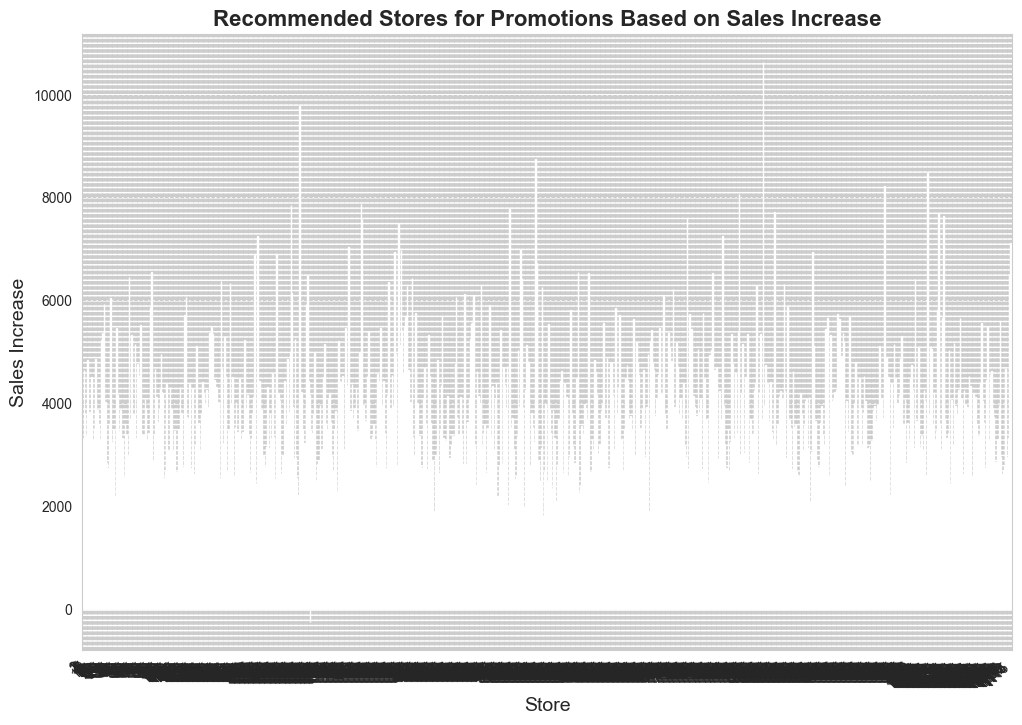

In [11]:
from Promo_Analysis import Promo_Analysis

# Create an instance of Promo_Analysis with cleaned data
promo_analysis = Promo_Analysis(df_train, df_test, df_store, df_sample_submission)

# Analyze the impact of promotions on sales and customer counts
promo_analysis.analyze_promo_sales_impact(save_path='../Images/promo_sales_impact.png')

# Recommend the most effective way to deploy promotions based on store performance
promo_analysis.recommend_promo_deployment(save_path='../Images/recommend_promo_deployment.png')

In [12]:

import pandas as pd

# Load datasets
df_test = pd.read_csv('../Data/test.csv')  # Adjust path as necessary
df_store = pd.read_csv('../Data/store.csv')  # Adjust path as necessary
df_sample_submission = pd.read_csv('../Data/sample_submission.csv')  # Adjust path as necessary

# Merge df_test with df_store on 'Store'
df_combined_test_store = pd.merge(df_test, df_store, on='Store', how='left')

# Merge df_combined_test_store with df_sample_submission on 'Id'
df_final_combined = pd.merge(df_combined_test_store, df_sample_submission, on='Id', how='left')

# Check the merged DataFrame
print(df_final_combined.head())
print(df_final_combined.info())

   Id  Store  DayOfWeek        Date  Open  Promo StateHoliday  SchoolHoliday  \
0   1      1          4  2015-09-17   1.0      1            0              0   
1   2      3          4  2015-09-17   1.0      1            0              0   
2   3      7          4  2015-09-17   1.0      1            0              0   
3   4      8          4  2015-09-17   1.0      1            0              0   
4   5      9          4  2015-09-17   1.0      1            0              0   

  StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0         c          a               1270.0                        9.0   
1         a          a              14130.0                       12.0   
2         a          c              24000.0                        4.0   
3         a          a               7520.0                       10.0   
4         a          c               2030.0                        8.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0

In [13]:
from Store_Analysis import StoreAnalysis
# Filter for stores with initially NA values in 'CompetitionDistance'
# Create an instance of StoreAnalysis with the combined DataFrame
store_analysis = StoreAnalysis(df_final_combined)

# Analyze stores open on all weekdays and get their average weekend sales
avg_weekend_sales = store_analysis.stores_open_all_weekdays()
print("Average Weekend Sales for Stores Open on All Weekdays:")
print(avg_weekend_sales)

# Check how the assortment type affects sales
assortment_sales = store_analysis.assortment_impact_on_sales()
print("\nAverage Sales by Assortment Type:")
print(assortment_sales)

# Analyze the impact of distance to competitors on sales
distance_sales = store_analysis.competition_distance_impact()
print("\nAverage Sales by Competition Distance:")
print(distance_sales)

# Analyze the impact of distance to competitors for city center stores
city_center_distance = store_analysis.competition_distance_city_center()
print("\nCity Center Stores and Competition Distance Sales:")
print(city_center_distance)

# Check how the opening or reopening of new competitors affects stores
stores_with_changes = store_analysis.competition_opening_impact()
print("\nStores with Changes in Competition Distance:")
print(stores_with_changes)

Average Weekend Sales for Stores Open on All Weekdays:
Store
1       0.0
3       0.0
7       0.0
8       0.0
9       0.0
       ... 
1111    0.0
1112    0.0
1113    0.0
1114    0.0
1115    0.0
Name: Sales, Length: 856, dtype: float64

Average Sales by Assortment Type:
Assortment
a    0.0
b    0.0
c    0.0
Name: Sales, dtype: float64

Average Sales by Competition Distance:
CompetitionDistance
20.0       0.0
30.0       0.0
40.0       0.0
50.0       0.0
60.0       0.0
          ... 
40860.0    0.0
46590.0    0.0
48330.0    0.0
58260.0    0.0
75860.0    0.0
Name: Sales, Length: 554, dtype: float64

City Center Stores and Competition Distance Sales:
         Id  Store DayOfWeek        Date  Open  Promo StateHoliday  \
0         1      1         4  2015-09-17   1.0      1            0   
1        15     21         4  2015-09-17   1.0      1            0   
2        19     25         4  2015-09-17   1.0      1            0   
3        35     46         4  2015-09-17   1.0      1            0 